In [1]:
import pandas as pd


In [2]:
ad = pd.read_csv("C:\\Users\\Admin\\Downloads\\archive (5)\\Admission_predict.csv")

In [3]:
ad.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
ad.drop('Serial No.',axis =1,inplace = True)

In [6]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [8]:
ad['Chance of Admit '] = ad['Chance of Admit '].apply(lambda x:1 if x>=0.5 else 0)

In [9]:
ad.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,1


In [10]:
ad['Chance of Admit '].value_counts()

1    367
0     33
Name: Chance of Admit , dtype: int64

In [13]:
x = ad.drop('Chance of Admit ',axis = 1)

In [14]:
y = ad['Chance of Admit ']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 20)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 7)
(80, 7)
(320,)
(80,)


In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
csf  = DecisionTreeClassifier()
csf.fit(x_train,y_train)

DecisionTreeClassifier()

In [20]:
y_prediction = csf.predict(x_test)

In [21]:
y_prediction

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [22]:
dframe = pd.DataFrame({'actual':y_test,'predicted':y_prediction})

In [23]:
dframe.head()

,actual,predicted
10,1,1
382,1,1
374,0,0
196,1,1
47,1,1


In [24]:
csf.classes_


array([0, 1], dtype=int64)

In [25]:
from sklearn.tree import plot_tree

In [28]:
ad.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [29]:
column = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research']

In [30]:
column

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research']

[Text(0.4375, 0.9444444444444444, 'CGPA <= 7.665\ngini = 0.139\nsamples = 320\nvalue = [24, 296]'),
 Text(0.20833333333333334, 0.8333333333333334, 'GRE Score <= 301.0\ngini = 0.388\nsamples = 19\nvalue = [14, 5]'),
 Text(0.08333333333333333, 0.7222222222222222, 'LOR  <= 2.75\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.041666666666666664, 0.6111111111111112, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.125, 0.6111111111111112, 'LOR  <= 3.25\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.08333333333333333, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.16666666666666666, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3333333333333333, 0.7222222222222222, 'CGPA <= 7.655\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.2916666666666667, 0.6111111111111112, 'GRE Score <= 313.0\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 1\nvalu

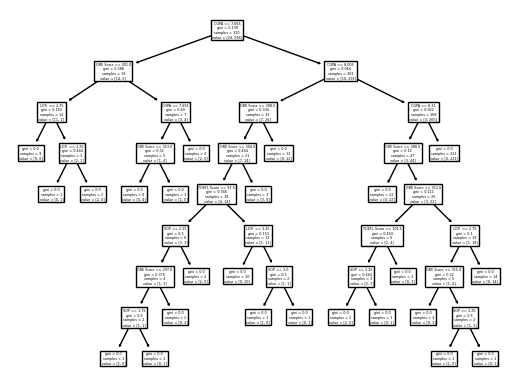

In [31]:
plot_tree(csf,feature_names = column)

In [32]:
from sklearn.tree import export_graphviz

In [33]:
from sklearn.metrics import accuracy_score,classification_report

In [34]:
accuracy_score(y_test,y_prediction)

0.8375

In [35]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.33      0.44      0.38         9
           1       0.93      0.89      0.91        71

    accuracy                           0.84        80
   macro avg       0.63      0.67      0.64        80
weighted avg       0.86      0.84      0.85        80



In [36]:
import matplotlib.pyplot as plt

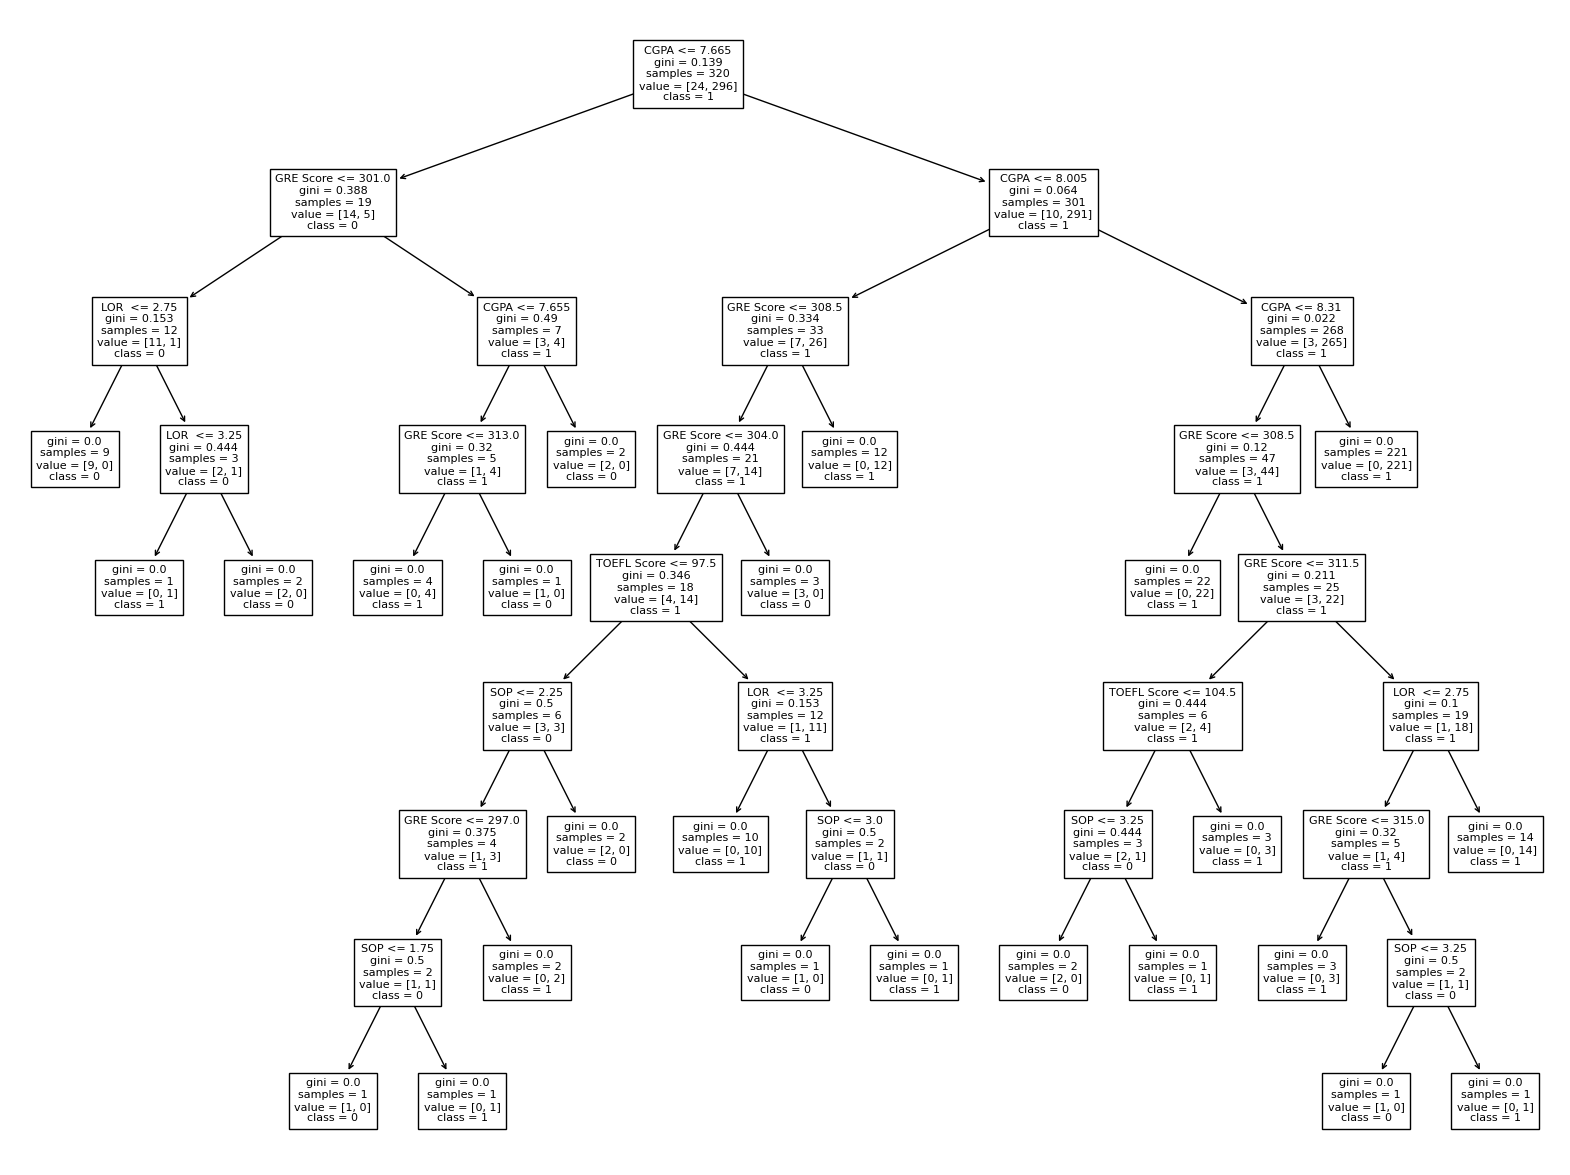

In [38]:
plt.figure(figsize = (20,15))
plot_tree(csf,feature_names = column,
         max_depth = 9,
         class_names = ['0','1'],
         filled = False,
         rounded = False,
         fontsize = 8)
plt.savefig('tree_visualization.png')
